In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style='whitegrid')

In [5]:
sentiment_df = pd.read_csv('sample_data/fear_greed_index.csv')
trader_df = pd.read_csv('sample_data/historical_data.csv')

In [6]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

In [7]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


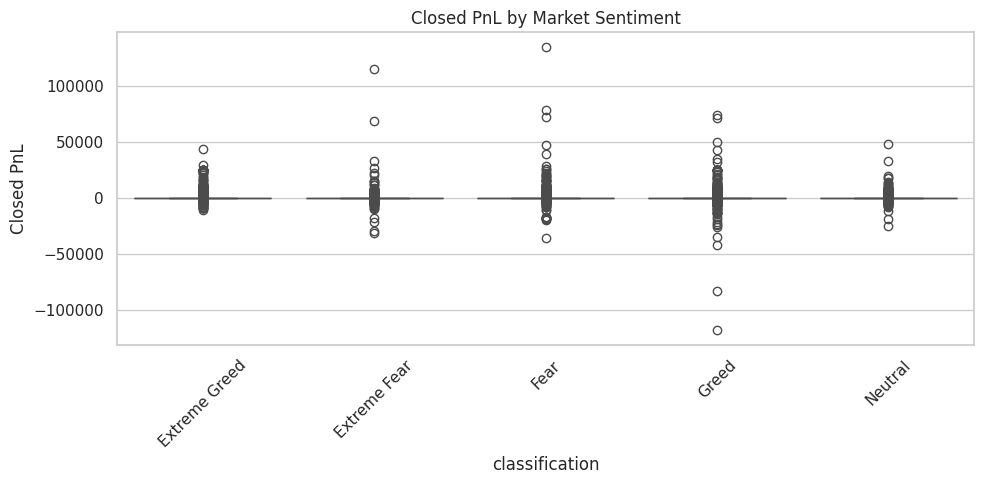

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

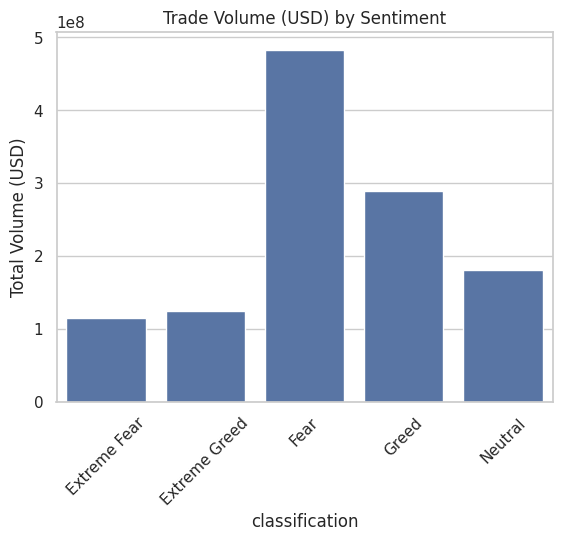

In [9]:
volume_df = merged_df.groupby('classification')['Size USD'].sum().reset_index()
sns.barplot(x='classification', y='Size USD', data=volume_df)
plt.title('Trade Volume (USD) by Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xticks(rotation=45)
plt.show()

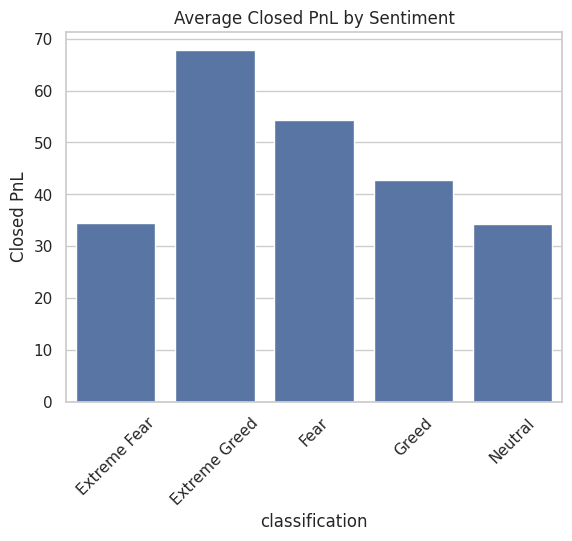

In [10]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
sns.barplot(x='classification', y='Closed PnL', data=avg_pnl)
plt.title('Average Closed PnL by Sentiment')
plt.xticks(rotation=45)
plt.show()

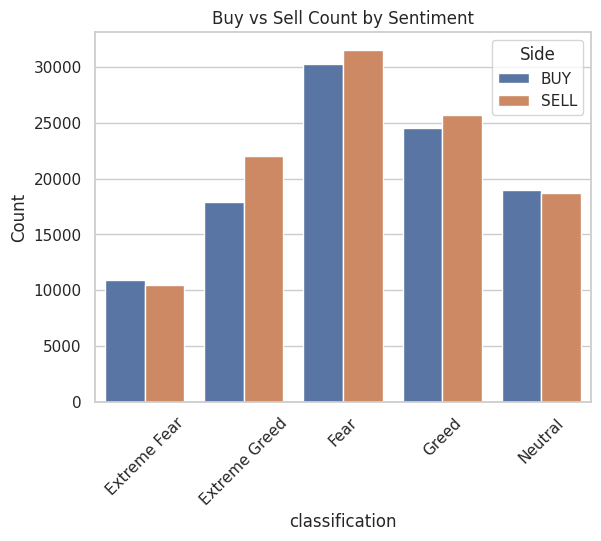

In [11]:
trade_side_counts = merged_df.groupby(['classification', 'Side']).size().reset_index(name='Count')
sns.barplot(x='classification', y='Count', hue='Side', data=trade_side_counts)
plt.title('Buy vs Sell Count by Sentiment')
plt.xticks(rotation=45)
plt.show()

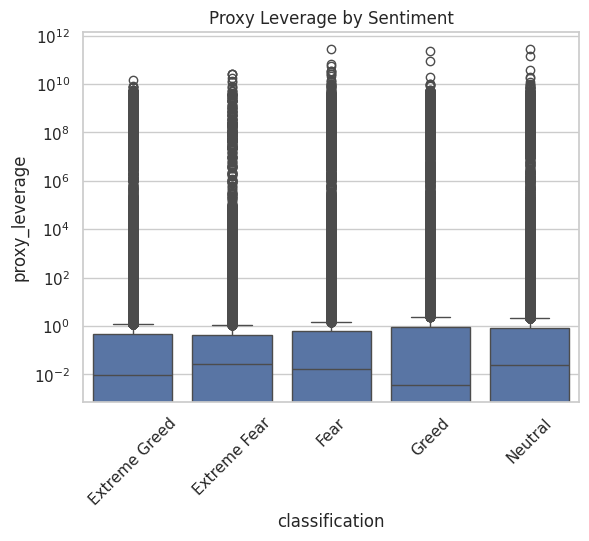

In [12]:
# Optional: Create a proxy leverage if you want
merged_df['proxy_leverage'] = merged_df['Size USD'] / (merged_df['Start Position'] + 1e-5)

sns.boxplot(x='classification', y='proxy_leverage', data=merged_df)
plt.title('Proxy Leverage by Sentiment')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()